# Сведенья о пациентах

Представим ситуацию, что вам прислали файл с данными о результатах обследования группы пациентов. О формате файла известно, что он текстовый. Допустим, что Вам нужны лишь сведения о поле и возрасте пациентов, чтобы принять решение о дальнейших шагах.

In [11]:
%pylab inline
import pandas as pd
from io import StringIO

Populating the interactive namespace from numpy and matplotlib


In [3]:
ssylka = 'd/data.txt'

`Pandas` предоставляет методы для чтения не совсем идеальных файлов данных, с которыми приходится сталкиваться.

Попробуем справиться с особенностями данного файла, которые могут помешать нам загрузить данные, если мы не будем задавать никаких дополнительных параметров к методу чтения текстовых файлов наиболее распространённого формата - `CSV` (comma-separated values).

In [4]:
D = pd.read_csv(ssylka)
D.head()

,# Data from the article
0,# Schleiger E. и др. Poststroke QEEG informs e...
1,# http://onlinelibrary.wiley.com/doi/10.1111/p...
2,ID\tHemisphere\tAge\tGender\tMoCA predischarge...
3,1\tR\t77\tM\t26.0\t26.0\t3\t1.0\t1\t1
4,2L\tL\t84\tM\t15.0\t21.0\t1\t0.0\t1\t0


Содержимое файла загружено в таблицу, однако не так, как нам хотелось бы.

Первые строчки, начинающиеся со знака `#` похожи на комментарии. Остальные строчки содержат наклонную черту с буквой `t` - обозначение символа табуляции (длинного пробела фиксированной ширины для формирования таблиц).


In [5]:
D = pd.read_csv(ssylka, delimiter='\t', comment='#')
D.head()

,ID,Hemisphere,Age,Gender,MoCA predischarge,MoCA outcome,NIHSS predischarge,NIHSS outcome,mRS predischarge,mRS outcome
0,1,R,77,M,26.0,26.0,3,1.0,1,1
1,2L,L,84,M,15.0,21.0,1,0.0,1,0
2,3,L,47,M,13.0,22.0,3,0.0,2,0
3,4L,R,72,M,20.0,23.0,10,1.0,4,1
4,5,L,61,F,26.0,NaN,0,NaN,0,0


С помощью дополнительных параметров мы указали команде чтения, что нужно пропускать комментарии и использовать специальный разделитель.

Однако, в таблице много колонок, а нам нужны только две.
При работе с большими наборами данных, где колонок могут быть сотни, может быть существенным ограничить количество загружаемых колонок.
Для этого воспользуемся соответствующим параметром.

In [6]:
D = pd.read_csv(ssylka, delimiter='\t', comment='#', usecols=['Age','Gender'])
D

,Age,Gender
0,77,M
1,84,M
2,47,M
3,72,M
4,61,F
5,78,F
6,49,M
7,79,F
8,77,M
9,74,M


По этим колонкам можно оценить половозрастной состав выборки пациентов.

In [7]:
D.Gender.value_counts()

M    23
F    12
Name: Gender, dtype: int64

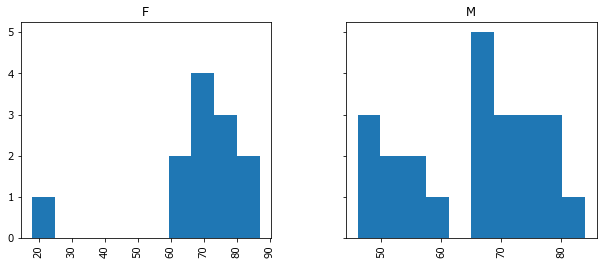

In [8]:
D.hist(by='Gender', sharey=True, figsize=(10,4));

Рассмотрим этот набор данных, описывающий пациентов, принявших участие в исследовании 
[Schleiger E. et al. Poststroke QEEG informs early prognostication of cognitive impairment //Psychophysiology. – 2016.](http://onlinelibrary.wiley.com/doi/10.1111/psyp.12785/full)

Задача исследования было найти биомаркер когнитивных нарушений после инсульта.

Представим, что мы нашли онлайн версию статьи.
Как извлечь данные из веб-страницы?

Table 1. Patient Demographics


<table class="table table--article-section" style=""><thead class="table__header table__header-data--bottom"><tr class="table__row"><th class="table__header-data table-border--bottom ">ID</th><th class="table__header-data table-border--bottom table-align--center">Hemisphere</th><th class="table__header-data table-border--bottom table-align--center">Age</th><th class="table__header-data table-border--bottom table-align--center">Gender</th><th class="table__header-data table-border--bottom table-align--center">MoCA predischarge</th><th class="table__header-data table-border--bottom table-align--center">MoCA outcome</th><th class="table__header-data table-border--bottom table-align--center">NIHSS predischarge</th><th class="table__header-data table-border--bottom table-align--center">NIHSS outcome</th><th class="table__header-data table-border--bottom table-align--center">mRS predischarge</th><th class="table__header-data table-border--bottom table-align--center">mRS outcome</th></tr></thead><tfoot class="table__footer"><tr class="table__row"><td colspan="10" class="table__data"><ol><li id="psyp12785-note-0002"> <p><em>Note</em>. MoCA = Montreal Cognitive Assessment; NIHSS = National Institute of Health Stoke Scale; mRS = modified Rankin Scale; R = right hemisphere stroke; L = left hemisphere stroke.</p></li><li id="psyp12785-note-0003"> <p><sup>L</sup>Patient received tissue plasminogen activator (tPA).</p></li><li id="psyp12785-note-0004"> <p><sup>W</sup>Patient had wake-up stroke.</p></li></ol></td></tr></tfoot><tbody class="table__body table__data--top"><tr class="table__row"><td class="table__data ">1</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">77</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">2<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003" class="js-link__note link__note" title="Link to note"><sup>L</sup></a></td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">84</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">15</td><td class="table__data table-align--center">21</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">3</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">47</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">13</td><td class="table__data table-align--center">22</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">4<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003" class="js-link__note link__note" title="Link to note"><sup>L</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">72</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">20</td><td class="table__data table-align--center">23</td><td class="table__data table-align--center">10</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">5</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">61</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">6<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">78</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">25</td><td class="table__data table-align--center">24</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">7</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">49</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">5</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">2</td></tr><tr class="table__row"><td class="table__data ">8<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003" class="js-link__note link__note" title="Link to note"><sup>L</sup></a></td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">79</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">14</td><td class="table__data table-align--center">7</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">4</td></tr><tr class="table__row"><td class="table__data ">9<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003" class="js-link__note link__note" title="Link to note"><sup>L</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">77</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">15</td><td class="table__data table-align--center">15</td><td class="table__data table-align--center">7</td><td class="table__data table-align--center">5</td><td class="table__data table-align--center">4</td></tr><tr class="table__row"><td class="table__data ">10</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">74</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">22</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">2</td></tr><tr class="table__row"><td class="table__data ">11<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003 #psyp12785-note-0004" class="js-link__note link__note" title="Link to notes"><sup>WL</sup></a></td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">54</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">28</td><td class="table__data table-align--center">30</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">12</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">65</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">29</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">13</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">80</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">14<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">87</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">16</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">5</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">3</td></tr><tr class="table__row"><td class="table__data ">15</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">76</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">3</td></tr><tr class="table__row"><td class="table__data ">16</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">18</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">28</td><td class="table__data table-align--center">30</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">17</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">61</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">24</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">18</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">72</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">21</td><td class="table__data table-align--center">21</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">2</td></tr><tr class="table__row"><td class="table__data ">19<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003" class="js-link__note link__note" title="Link to note"><sup>L</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">52</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">21</td><td class="table__data table-align--center">13</td><td class="table__data table-align--center">5</td><td class="table__data table-align--center">4</td></tr><tr class="table__row"><td class="table__data ">20<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003" class="js-link__note link__note" title="Link to note"><sup>L</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">66</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">22</td><td class="table__data table-align--center">28</td><td class="table__data table-align--center">7</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">3</td></tr><tr class="table__row"><td class="table__data ">21</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">67</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">18</td><td class="table__data table-align--center">24</td><td class="table__data table-align--center">5</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">2</td></tr><tr class="table__row"><td class="table__data ">22<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">71</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">11</td><td class="table__data table-align--center">25</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">23<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">61</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">25</td><td class="table__data table-align--center">28</td><td class="table__data table-align--center">4</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">24<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">78</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">15</td><td class="table__data table-align--center">20</td><td class="table__data table-align--center">19</td><td class="table__data table-align--center">7</td><td class="table__data table-align--center">5</td><td class="table__data table-align--center">3</td></tr><tr class="table__row"><td class="table__data ">25</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">69</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">26</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">74</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">23</td><td class="table__data table-align--center">25</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">2</td></tr><tr class="table__row"><td class="table__data ">27</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">66</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">23</td><td class="table__data table-align--center">23</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">28<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">67</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">28</td><td class="table__data table-align--center">29</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">29<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">81</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">18</td><td class="table__data table-align--center">23</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">30</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">46</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">29</td><td class="table__data table-align--center">29</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">31<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">69</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">24</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">32</td><td class="table__data table-align--center">L</td><td class="table__data table-align--center">53</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">NA</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">1</td></tr><tr class="table__row"><td class="table__data ">33<a href="#psyp12785-note-0004" rel="references:#psyp12785-note-0004" class="js-link__note link__note" title="Link to note"><sup>W</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">57</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">0</td></tr><tr class="table__row"><td class="table__data ">34<a href="#psyp12785-note-0003" rel="references:#psyp12785-note-0003 #psyp12785-note-0004" class="js-link__note link__note" title="Link to notes"><sup>WL</sup></a></td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">72</td><td class="table__data table-align--center">F</td><td class="table__data table-align--center">15</td><td class="table__data table-align--center">14</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">1</td><td class="table__data table-align--center">3</td><td class="table__data table-align--center">2</td></tr><tr class="table__row"><td class="table__data ">35</td><td class="table__data table-align--center">R</td><td class="table__data table-align--center">69</td><td class="table__data table-align--center">M</td><td class="table__data table-align--center">26</td><td class="table__data table-align--center">27</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">0</td><td class="table__data table-align--center">2</td><td class="table__data table-align--center">0</td></tr></tbody></table>

Выделяем/копируем текст таблицы, делаем из него длинную строку и через строковый буфер (`StringIO`) передаём в функцию чтения табличных файлов как будто это текстовый файл стандартного табличного формата.

In [12]:
D=pd.read_table(StringIO('''ID	Hemisphere	Age	Gender	MoCA predischarge	MoCA outcome	NIHSS predischarge	NIHSS outcome	mRS predischarge	mRS outcome
1	R	77	M	26	26	3	1	1	1
2L	L	84	M	15	21	1	0	1	0
3	L	47	M	13	22	3	0	2	0
4L	R	72	M	20	23	10	1	4	1
5	L	61	F	26	NA	0	NA	0	0
6W	L	78	F	25	24	0	0	0	0
7	L	49	M	NA	27	5	1	2	2
8L	L	79	F	NA	14	7	4	4	4
9L	R	77	M	NA	15	15	7	5	4
10	L	74	M	NA	22	3	0	1	2
11WL	L	54	M	28	30	0	0	0	0
12	L	65	M	26	29	1	0	1	0
13	R	80	M	NA	NA	3	0	2	1
14W	L	87	F	16	NA	5	NA	4	3
15	L	76	M	NA	NA	4	NA	3	3
16	R	18	F	28	30	0	0	1	1
17	L	61	M	24	27	0	0	2	0
18	R	72	F	21	21	1	0	1	2
19L	R	52	M	NA	27	21	13	5	4
20L	R	66	M	22	28	7	3	4	3
21	R	67	M	18	24	5	1	3	2
22W	R	71	F	11	25	2	1	3	0
23W	R	61	F	25	28	4	1	3	1
24W	R	78	F	15	20	19	7	5	3
25	R	69	F	27	27	0	1	1	1
26	R	74	M	23	25	0	1	1	2
27	R	66	M	23	23	0	0	0	1
28W	L	67	M	28	29	0	0	0	0
29W	R	81	F	18	23	1	0	2	1
30	R	46	M	29	29	0	0	0	0
31W	R	69	M	24	27	1	0	1	0
32	L	53	M	NA	27	0	0	1	1
33W	R	57	M	26	26	1	0	1	0
34WL	R	72	F	15	14	2	1	3	2
35	R	69	M	26	27	0	0	2	0'''))
D

,ID,Hemisphere,Age,Gender,MoCA predischarge,MoCA outcome,NIHSS predischarge,NIHSS outcome,mRS predischarge,mRS outcome
0,1,R,77,M,26.0,26.0,3,1.0,1,1
1,2L,L,84,M,15.0,21.0,1,0.0,1,0
2,3,L,47,M,13.0,22.0,3,0.0,2,0
3,4L,R,72,M,20.0,23.0,10,1.0,4,1
4,5,L,61,F,26.0,NaN,0,NaN,0,0
5,6W,L,78,F,25.0,24.0,0,0.0,0,0
6,7,L,49,M,NaN,27.0,5,1.0,2,2
7,8L,L,79,F,NaN,14.0,7,4.0,4,4
8,9L,R,77,M,NaN,15.0,15,7.0,5,4
9,10,L,74,M,NaN,22.0,3,0.0,1,2


Обратите внимание, как библиотека pandas интеллектуально распознала текст 'NA' (Not Available) как отсутствующие значения и вставила в эти места NaN (Not a Number).

MoCA (Montreal Cognitive Assessment) - это тест для оценки когнитивных способностей.
Как видно из таблицы не все пациенты прошли его предварительно.
Большинство прошли этот тест дважды - в начале лечения и в конце. 
Много тех, кто прошел тест только в конце - это возможно те, кто не смог участвовать в предварительных измерениях из-за тяжелого состояния.
В любом случае мы видим, что данные неполные, и это нормально для реальных данных, собранных в медицинских учреждениях. Не все пациенты соглашаются на участие в исследованиях. Некоторые по тяжести состояния просто к этому не способны. Возможно, кого-то выписали досрочно или перевели в другое отделение.

По возрасту пациентов (колонка Age) понятно, что в основном это пожилые люди. Среди тех, кому за 70, немало со сниженными интеллектуальными способностями.
Однако, под ID=16 записана 18-летняя девушка, которая, впрочем перенесла инсульт почти без осложнений.

Наборы данных для публикации как правило обезличивают. Распространение сведений о болезни может сделать пациента уязвимым в ряде случаев.
Этика публикации данных о пациентах определяется понятием "врачебной тайны".

## Анонимизация биомедицинских данных

Мероприятия по анонимизации как правило сводятся к:

- замена имен на коды
- сдвиг дат в пределах месяца
- согласие на использование в исследовательских целях


Важным является размер выборки. Например, если в работе описывается всего пятеро пациентов с редким заболеванием в какой-то стране, и из них всего одна женщина, то знания факта, что данная женщина лежала в клинике, специализирующейся на этом заболевании, достаточно для установления идентичности личности и данных о течении болезни.

В идеале данные для одного исследования собирают с нескольких клиник примерно в одно время. Это затрудняет идентификацию.

## Индивидуальная динамика

Попробуем воспроизвести рисунок из статьи {numref}`psyp`. 


:::{figure-md} psyp
![](i/psyp12785-fig-0002-m.png)

График взаимодействия, показывающий изменения в оценках Montreal Cognitive Assessment (MoCA) между предварительными и окончательными измерениями.
:::

Но сначала посмотрим на него и подумаем:
> Есть ли в этом рисунке какое-либо применение статистических методов?

График имеет всего две координаты по горизонтальной оси: предварительный и окончательный. И значения из указанных колонок отложены по вертикальной оси.
Т.е. это индивидуальные необработанные данные.

> Какую полезную информацию несет этот рисунок?

Соединительные линии показывают изменения в ходе лечения. И наклон большинства линий идёт вверх - способности пациентов в общем восстанавливались. У некоторых не изменились, у двоих ухудшились, но у большинства тенденция было положительной. И это видно из этого рисунка наглядно, без использования статистики!

> Как отображаются случаи, в которых одно из значений отсутствует (NaN)?

В паре мест видно маркеры, которые не соединены линиями. Это значит, что у этого значения не было пары, и соединять его линией просто не с чем.

Логика построения похожего рисунка сводится к отбору значений из соответствующих двух колонок и к подстановке к ним в качестве абсциссы значений 0.5 и 1.5. Можно и другие любые два числа, при условии установки подходящих пределов и подписей.

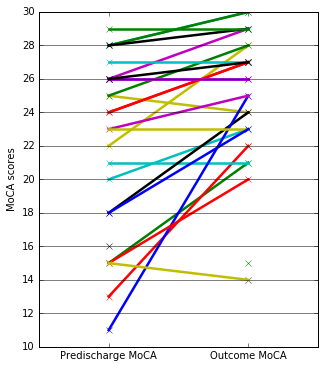

In [58]:
figsize(5,6)
xx=tile([.5,1.5],(len(D),1)).T
yy=D[['MoCA predischarge','MoCA outcome']].T
plot(xx, yy, marker='x', lw=2.5);
xlim((0,2)); xticks([.5,1.5], ['Predischarge MoCA','Outcome MoCA'])
ylabel('MoCA scores'); 
yticks(arange(10,32,2)); grid(axis='y', ls='-');

Чтобы контролировать форму и цвет маркеров - проще выводить по одной линии в цикле.
Еще проще воспользоваться готовой функцией `parallel_coordinates`

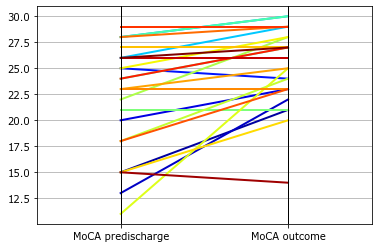

In [13]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(D, class_column='ID', cols=['MoCA predischarge','MoCA outcome'], lw=2, colormap='jet');
gca().legend_.remove(); xlim(-0.5,1.5);

Поскольку мы извлекли данные из кода веб-страницы, то для дальнейшего анализа удобнее иметь данные в виде готового файла.

Сохраним данные в текстовый файл. 

In [67]:
D.to_csv('stroke.tsv', sep=b'\t', index=False)